# ATIV-04-ET-01
## Análise e Validação do Dataset
Projeto: Classificação de Frutas e Vegetais
Autora: Maristela Machado

In [7]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import hashlib
from tqdm import tqdm

In [8]:
import os

base_path = "../dataset"
splits = ["train", "test", "validation"]

structure = {}

for split in splits:
    split_path = os.path.join(base_path, split)
    structure[split] = os.listdir(split_path)

structure

{'train': ['apple',
  'banana',
  'beetroot',
  'bell pepper',
  'cabbage',
  'capsicum',
  'carrot',
  'cauliflower',
  'chilli pepper',
  'corn',
  'cucumber',
  'eggplant',
  'garlic',
  'ginger',
  'grapes',
  'jalepeno',
  'kiwi',
  'lemon',
  'lettuce',
  'mango',
  'onion',
  'orange',
  'paprika',
  'pear',
  'peas',
  'pineapple',
  'pomegranate',
  'potato',
  'raddish',
  'soy beans',
  'spinach',
  'sweetcorn',
  'sweetpotato',
  'tomato',
  'turnip',
  'watermelon'],
 'test': ['apple',
  'banana',
  'beetroot',
  'bell pepper',
  'cabbage',
  'capsicum',
  'carrot',
  'cauliflower',
  'chilli pepper',
  'corn',
  'cucumber',
  'eggplant',
  'garlic',
  'ginger',
  'grapes',
  'jalepeno',
  'kiwi',
  'lemon',
  'lettuce',
  'mango',
  'onion',
  'orange',
  'paprika',
  'pear',
  'peas',
  'pineapple',
  'pomegranate',
  'potato',
  'raddish',
  'soy beans',
  'spinach',
  'sweetcorn',
  'sweetpotato',
  'tomato',
  'turnip',
  'watermelon'],
 'validation': ['apple',
  'ban

In [9]:
import pandas as pd

data_info = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        count = len(os.listdir(cls_path))
        data_info.append({
            "split": split,
            "class": cls,
            "count": count
        })

df = pd.DataFrame(data_info)
df.head()

,split,class,count
0,train,apple,68
1,train,banana,75
2,train,beetroot,88
3,train,bell pepper,90
4,train,cabbage,92


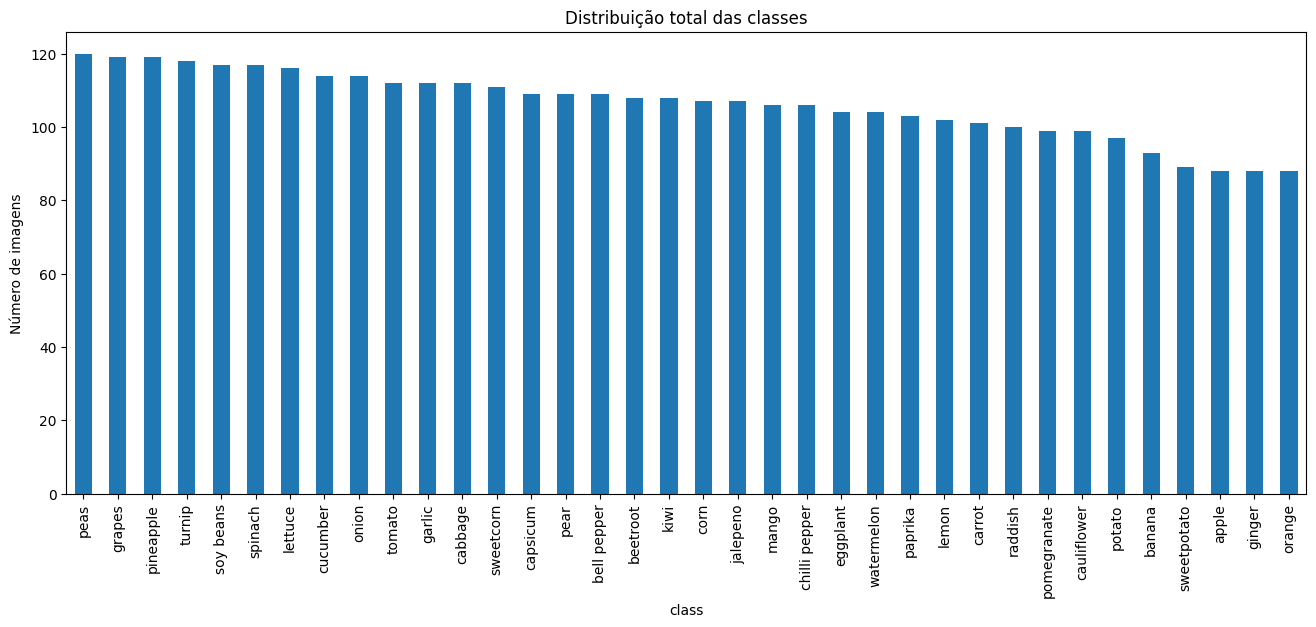

In [10]:
import matplotlib.pyplot as plt

df_total = df.groupby("class")["count"].sum().sort_values(ascending=False)

plt.figure(figsize=(16,6))
df_total.plot(kind="bar")
plt.title("Distribuição total das classes")
plt.ylabel("Número de imagens")
plt.xticks(rotation=90)
plt.show()

In [11]:
from PIL import Image

invalid_images = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                img.verify()
            except:
                invalid_images.append(img_path)

print("Imagens inválidas:", len(invalid_images))

Imagens inválidas: 0


In [12]:
sizes = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                sizes.append(img.size)
            except:
                pass

sizes_df = pd.DataFrame(sizes, columns=["width", "height"])
sizes_df.describe()

,width,height
count,3825.000000,3825.000000
mean,1359.187190,1132.145359
std,995.357684,806.856030
min,133.000000,147.000000
25%,780.000000,620.000000
50%,1024.000000,946.000000
75%,1600.000000,1300.000000
max,7360.000000,6351.000000


In [ ]:
# verificação de duplicatas
import hashlib

hashes = {}
duplicates = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    if file_hash in hashes:
                        duplicates.append((img_path, hashes[file_hash]))
                    else:
                        hashes[file_hash] = img_path
            except:
                pass

print("Duplicatas encontradas:", len(duplicates))

Duplicatas encontradas: 910


In [14]:
report = {
    "total_classes": df["class"].nunique(),
    "total_images": df["count"].sum(),
    "invalid_images": len(invalid_images),
    "duplicates": len(duplicates),
    "mean_width": sizes_df["width"].mean(),
    "mean_height": sizes_df["height"].mean()
}

pd.DataFrame([report])

,total_classes,total_images,invalid_images,duplicates,mean_width,mean_height
0,36,3825,0,910,1359.18719,1132.145359


In [15]:
SIZE = (128, 128)   # tamanho padrão
MODE = "L"          # grayscale

In [ ]:
#normalização e conversão das imagens para PeB

import os
from PIL import Image
from tqdm import tqdm

base_path = "../dataset"
output_path = "../dataset_clean"

splits = ["train", "test", "validation"]
SIZE = (128, 128)


for split in splits:
    split_dir = os.path.join(output_path, split)
    os.makedirs(split_dir, exist_ok=True)

for split in splits:
    print(f"\n🔄 Processando {split}...")
    
    split_path = os.path.join(base_path, split)
    out_split_path = os.path.join(output_path, split)

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        out_cls_path = os.path.join(out_split_path, cls)
        os.makedirs(out_cls_path, exist_ok=True)

        for img_name in tqdm(os.listdir(cls_path)):
            img_path = os.path.join(cls_path, img_name)
            out_img_path = os.path.join(out_cls_path, img_name)

            try:
                img = Image.open(img_path)
                img = img.convert("L")           # grayscale
                img = img.resize(SIZE)           # normalização
                img.save(out_img_path)
            except:
                pass

print("\n✅ Normalização e conversão finalizadas!")


🔄 Processando train...


 72%|███████▏  | 49/68 [00:01<00:00, 31.26it/s]c:\Users\user\Desktop\classifiçaode frutaseverdura.ml\venv\Lib\site-packages\PIL\Image.py:1034: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 84/84 [00:02<00:00, 34.41it/s]



🔄 Processando test...


100%|██████████| 10/10 [00:00<00:00, 21.37it/s]



🔄 Processando validation...


100%|██████████| 10/10 [00:00<00:00, 22.15it/s]


✅ Normalização e conversão finalizadas!


In [17]:
print(os.listdir("../dataset_clean"))
print(os.listdir("../dataset_clean/train")[:5])

['test', 'train', 'validation']
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage']


In [ ]:
#detecção das duplicatas na versão convertida
import hashlib

def image_hash(path):
    try:
        with open(path, 'rb') as f:
            return hashlib.md5(f.read()).hexdigest()
    except:
        return None

clean_path = "../dataset_clean"
hashes = {}
gray_duplicates = []

for split in splits:
    split_path = os.path.join(clean_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            h = image_hash(img_path)
            if h:
                if h in hashes:
                    gray_duplicates.append((img_path, hashes[h]))
                else:
                    hashes[h] = img_path

print("Duplicatas semânticas (após normalização + grayscale):", len(gray_duplicates))

Duplicatas semânticas (após normalização + grayscale): 911


In [ ]:
#relatorio
import pandas as pd

df_gray = pd.DataFrame(gray_duplicates, columns=["duplicate_path", "original_path"])
df_gray.to_csv("../outputs/duplicatas_semanticas.csv", index=False)

In [ ]:
#remoção as duplicatas

import os
import hashlib
import shutil
import pandas as pd
from tqdm import tqdm

source_path = "../dataset_clean"
target_path = "../dataset_dedup"

splits = ["train", "test", "validation"]

# Criar estrutura base
for split in splits:
    os.makedirs(os.path.join(target_path, split), exist_ok=True)

hashes = {}
kept = []
removed = []

def image_hash(path):
    try:
        with open(path, 'rb') as f:
            return hashlib.md5(f.read()).hexdigest()
    except:
        return None

print("🔄 Iniciando deduplicação...")

for split in splits:
    print(f"\n📁 Processando {split}")
    split_path = os.path.join(source_path, split)
    out_split_path = os.path.join(target_path, split)

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        out_cls_path = os.path.join(out_split_path, cls)
        os.makedirs(out_cls_path, exist_ok=True)

        for img_name in tqdm(os.listdir(cls_path)):
            img_path = os.path.join(cls_path, img_name)
            h = image_hash(img_path)

            if h:
                if h not in hashes:
                    hashes[h] = img_path
                    # copia imagem única
                    shutil.copy2(img_path, os.path.join(out_cls_path, img_name))
                    kept.append(img_path)
                else:
                    removed.append((img_path, hashes[h]))

print("\n✅ Deduplicação finalizada!")
print("Imagens mantidas:", len(kept))
print("Duplicatas removidas:", len(removed))

🔄 Iniciando deduplicação...

📁 Processando train


100%|██████████| 84/84 [00:00<00:00, 1040.33it/s]



📁 Processando test


100%|██████████| 10/10 [00:00<00:00, 4712.70it/s]



📁 Processando validation


100%|██████████| 10/10 [00:00<00:00, 5823.00it/s]


✅ Deduplicação finalizada!
Imagens mantidas: 2914
Duplicatas removidas: 911


In [23]:
#relatorios

#csv das removidas
df_removed = pd.DataFrame(removed, columns=["duplicate_path", "original_path"])
df_removed.to_csv("../outputs/duplicatas_removidas.csv", index=False)

#csv da mantidas
df_kept = pd.DataFrame(kept, columns=["kept_image"])
df_kept.to_csv("../outputs/imagens_unicas.csv", index=False)

print(os.listdir("../dataset_dedup"))
print(os.listdir("../dataset_dedup/train")[:5])

['test', 'train', 'validation']
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage']
